In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Il file weather.csv contiene informazioni sul meteo di alcune città australiane. Caricare il suo contenuto in un dataframe.

   Quante righe e quante colonne ci sono nel dataset?

   Ci sono valori mancanti?

In [ ]:
df = pd.read_csv('weather.csv', sep=';')
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,No,No
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,No,Yes
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,Yes,Yes
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,Yes,Yes
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,Yes,No


In [ ]:
print(f'Numero righe: {df.shape[0]}')
print(f'Numero colonne: {df.shape[1]}')

Numero righe: 14468
Numero colonne: 17


In [ ]:
df.isnull().sum()

,0
Month,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [ ]:
print(f'Ci sono valori mancanti: {df.isnull().values.any()}')

Ci sono valori mancanti: False


In [ ]:
print(f'Numero di valori mancanti: {df.isnull().sum().sum()}')

Numero di valori mancanti: 0


2. Aggiungere al dataset:

- una nuova colonna "temp_diff" con la differenza in valore assoluto tra i valori di temperatura alle 9 del mattino e le 3 del pomeriggio

- una nuova colonna "hum_diff" con la differenza in valore assoluto tra i valori di umidità alle 9 del mattino e le 3 del pomeriggio

In [ ]:
df['temp_diff'] = abs(df['Temp9am'] - df['Temp3pm'])
df['hum_diff'] = abs(df['Humidity9am'] - df['Humidity3pm'])
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,temp_diff,hum_diff
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,No,No,10.6,29
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,No,Yes,6.9,24
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,Yes,Yes,2.3,5
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,Yes,Yes,2.4,9
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,Yes,No,5.0,29


3. Selezionare soltanto le righe in cui "temp_diff" è maggiore di 10 e "hum_diff" è maggiore di 20. Qual è la location in cui si verifica più spesso questa elevata escursione termica (ovvero la location con il maggior numero di righe nella selezione)?

In [ ]:
filtered_df = df[(df['temp_diff'] > 10) & (df['hum_diff'] > 20)]

In [ ]:
filtered_df['Location'].value_counts(sort=True).idxmax()    #head(1).index[0]

'Richmond'

4. Quante location sono presenti nel file?

In [ ]:
df['Location'].nunique()

42

In [ ]:
len(df['Location'].unique())

42

5. Trasformare i valori della colonna "RainToday" convertendo "yes" in 1 e "no" in 0. Utilizzando il metodo groupby calcolare per ogni location il numero di giorni di pioggia.

In [ ]:
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,temp_diff,hum_diff
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,0,No,10.6,29
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,0,Yes,6.9,24
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,1,Yes,2.3,5
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,1,Yes,2.4,9
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,1,No,5.0,29


In [ ]:
df.groupby('Location')['RainToday'].sum()

,RainToday
Location,
Adelaide,90
Albury,88
AliceSprings,39
BadgerysCreek,57
Ballarat,110
Bendigo,90
Brisbane,75
Cairns,88
Canberra,81


6. Creare una tabella pivot in cui per ogni location (sulle righe) e per ogni mese (sulle colonne) sia calcolata la temperatura massima media.

In [ ]:
pd.pivot_table(df, values='MaxTemp', index='Location', columns='Month', aggfunc='mean')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Location,,,,,,,,,,,,
Adelaide,31.190323,29.289655,28.641935,24.826667,19.793548,16.043333,15.283871,17.658065,17.420000,20.993548,24.706667,28.658065
Albury,31.487097,32.441379,30.790323,25.810000,18.077419,13.423333,13.280645,15.248387,16.823333,19.667742,25.586667,30.500000
AliceSprings,34.858065,37.179310,35.148387,31.824138,25.370000,20.690000,21.080000,22.638710,24.620000,30.516667,35.383333,34.532000
BadgerysCreek,28.792857,30.251724,29.412903,26.246667,23.225806,18.106667,18.483871,18.716129,21.093103,24.477419,29.734483,32.369231
Ballarat,26.934483,26.288889,24.796667,20.093333,14.925806,10.551724,10.151613,11.803226,13.190000,15.556667,19.276667,24.596667
Bendigo,30.100000,30.881481,28.996774,23.186667,17.045161,12.746667,12.812903,14.251613,15.520000,18.925806,24.383333,28.664516
Brisbane,30.374074,32.303846,29.929032,28.783333,26.983871,21.526667,22.464516,23.153333,24.880000,27.083871,30.388889,30.058065
Cairns,32.116667,33.248276,31.761290,30.431034,28.636842,27.413333,26.977419,26.600000,28.300000,30.100000,31.939130,32.150000
Canberra,28.541935,29.306897,27.690323,23.880000,17.326667,13.013333,12.741935,14.258065,15.793333,18.477419,25.425926,28.716667


7. Visualizzare in un unico grafico la distribuzione dei valori di temperatura massima nel mese di maggio (5) e dicembre (12).

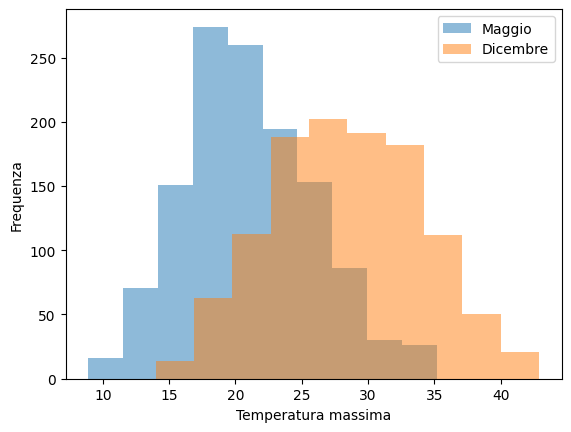

In [ ]:
plt.hist(df[df['Month'] == 5]['MaxTemp'], alpha=0.5, label='Maggio')
plt.hist(df[df['Month'] == 12]['MaxTemp'], alpha=0.5, label='Dicembre')
plt.legend(loc='upper right')
plt.xlabel('Temperatura massima')
plt.ylabel('Frequenza')
plt.show()

8. Visualizzare in uno scatterplot la relazione tra i valori di pressione e i valori di umidità (fare 2 plot distinti nella stessa figura, uno per i valori 9am e un altro per i valori 3pm). Colorare i punti di due colori diversi in base ai valori di RainToday.

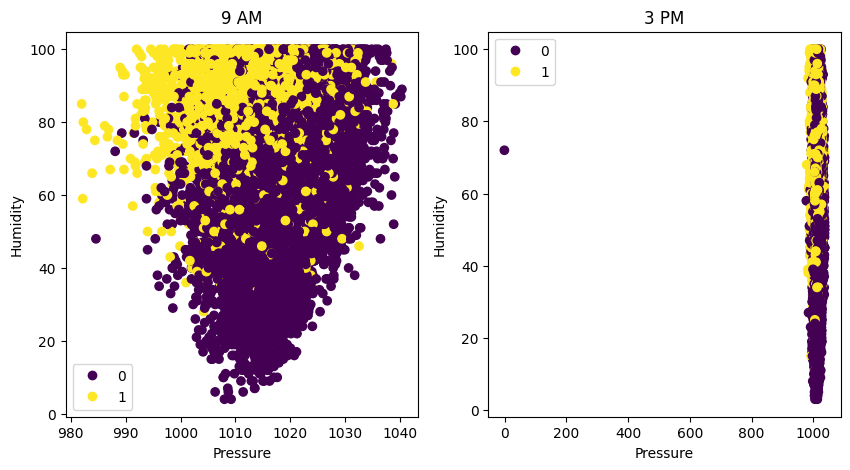

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
s = axes[0].scatter(df['Pressure9am'], df['Humidity9am'], c=df['RainToday'])
axes[0].set_xlabel("Pressure")
axes[0].set_ylabel("Humidity")
axes[0].set_title('9 AM')
axes[0].legend(handles=s.legend_elements()[0], labels=s.legend_elements()[1])

axes[1].scatter(df['Pressure3pm'], df['Humidity3pm'], c=df['RainToday'])
axes[1].set_xlabel("Pressure")
axes[1].set_ylabel("Humidity")
axes[1].set_title('3 PM')
axes[1].legend(loc='best')
axes[1].legend(handles=s.legend_elements()[0], labels=s.legend_elements()[1])

Nel secondo plot ci sono degli outlier nei valori di pressione, li elimino per visualizzare meglio i dati.

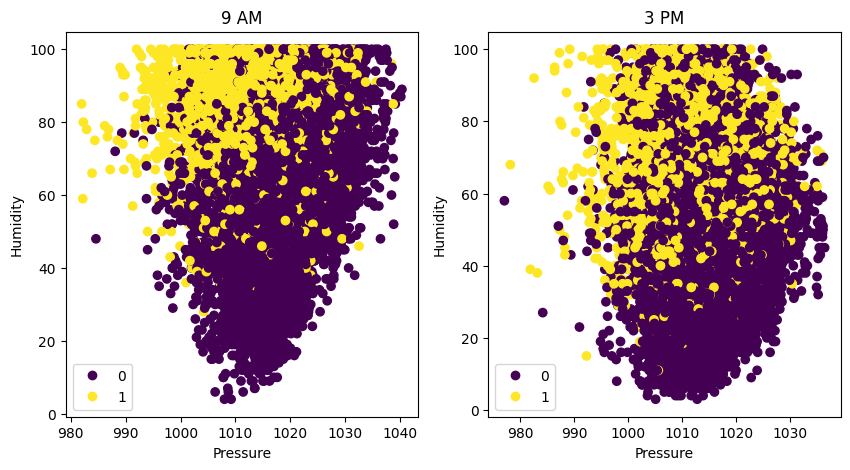

In [ ]:
df['Pressure3pm'] = np.where(df['Pressure3pm'] == -1, np.nan, df['Pressure3pm'])
df.dropna(inplace=True)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
s = axes[0].scatter(df['Pressure9am'], df['Humidity9am'], c=df['RainToday'])
axes[0].set_xlabel("Pressure")
axes[0].set_ylabel("Humidity")
axes[0].set_title('9 AM')
axes[0].legend(handles=s.legend_elements()[0], labels=s.legend_elements()[1])

axes[1].scatter(df['Pressure3pm'], df['Humidity3pm'], c=df['RainToday'])
axes[1].set_xlabel("Pressure")
axes[1].set_ylabel("Humidity")
axes[1].set_title('3 PM')
axes[1].legend(loc='best')
axes[1].legend(handles=s.legend_elements()[0], labels=s.legend_elements()[1])